In [ ]:
from boxPlotHelpers import * 

db = '../data/tor-et-extract.sqlite'
l = "us-central1-a"

In [3]:
def loadData(field,step,location,browser,label):
    return selectToList(db,"""
        SELECT """+field+""" FROM results WHERE step == """+str(step)+""" AND 
        location LIKE '%"""+location+"--"+browser+"""%' AND label LIKE '%"""+label+"""%';""")

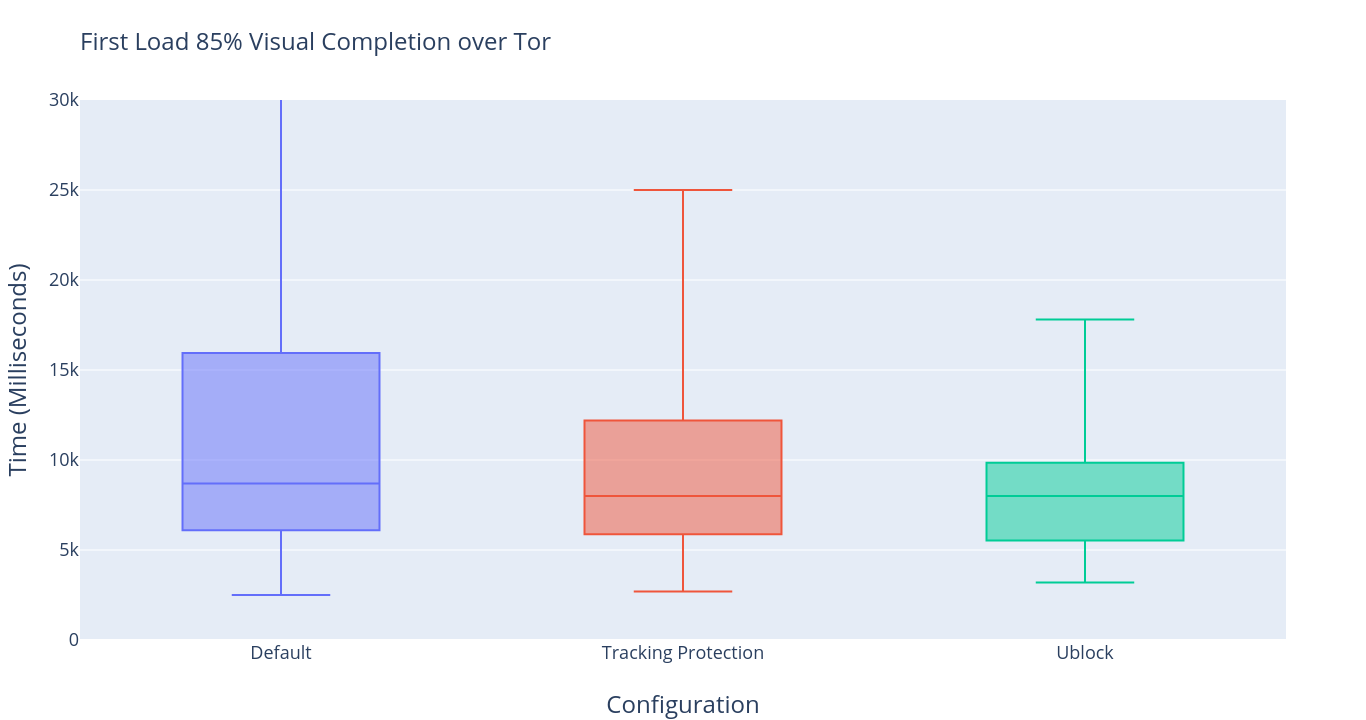

In [6]:
boxes = []
boxes.append(listToBox(loadData('visualComplete85',0,l,"tor","original"),"Default"))
boxes.append(listToBox(loadData('visualComplete85',0,l,"tor","trackingprotection"),"Tracking Protection"))
boxes.append(listToBox(loadData('visualComplete85',0,l,"tor","Ublock"),"Ublock"))
drawBoxes(boxes,'First Load 85% Visual Completion over Tor',xaxis_title="Configuration",xaxis_angle=0)
    

In [20]:
boxes = []
d1 = loadData('bytesIn',0,l,"tor","original")
d1 = list(map(lambda x : int(x),d1))
d2 = loadData('bytesIn',0,l,"tor","trackingprotection")
d2 = list(map(lambda x : int(x),d2))

In [24]:
from numpy import mean
print(median(d1))
print(median(d2))
print((median(d1)-median(d2))/median(d1))

2027068.0
1674245.0
0.174055828418


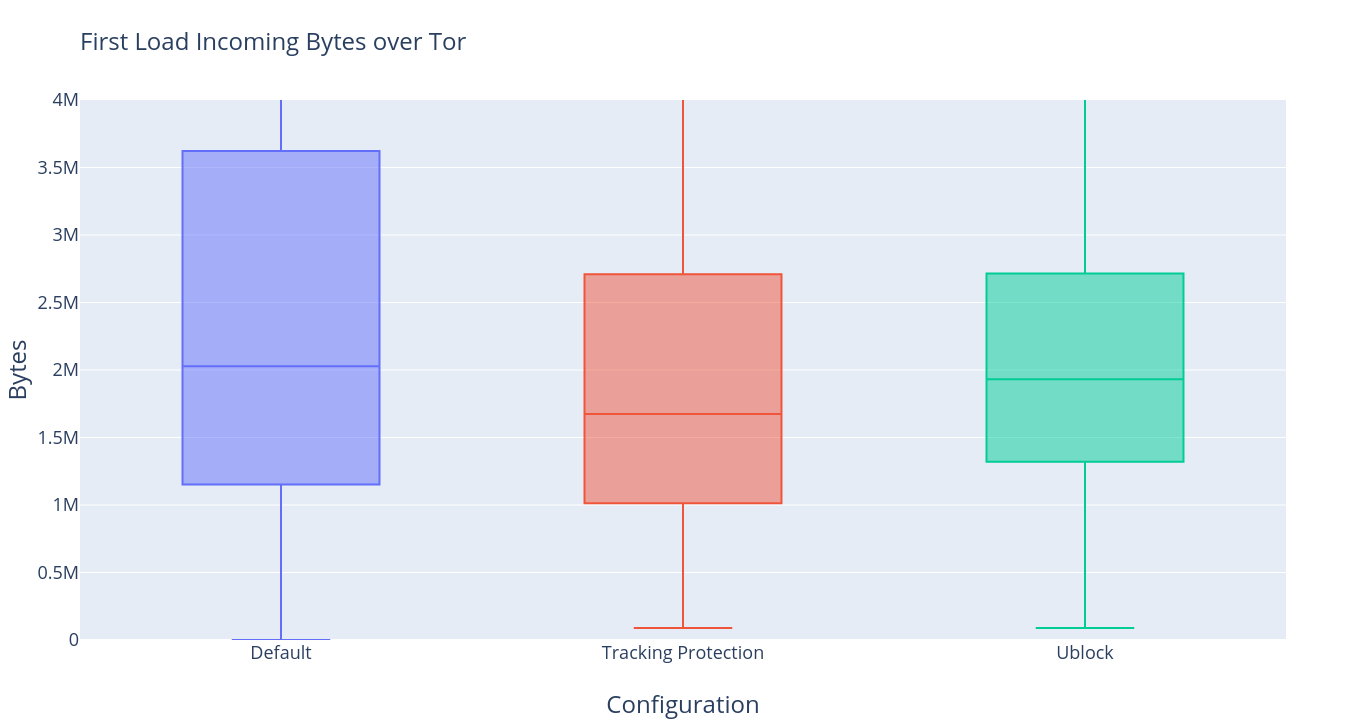

In [19]:
boxes.append(listToBox(d1,"Default"))
boxes.append(listToBox(d2,"Tracking Protection"))
boxes.append(listToBox(loadData('bytesIn',0,l,"tor","Ublock"),"Ublock"))
drawBoxes(boxes,'First Load Incoming Bytes over Tor',xaxis_title="Configuration",xaxis_angle=0,ylimit=4000000,yaxis_title='Bytes')

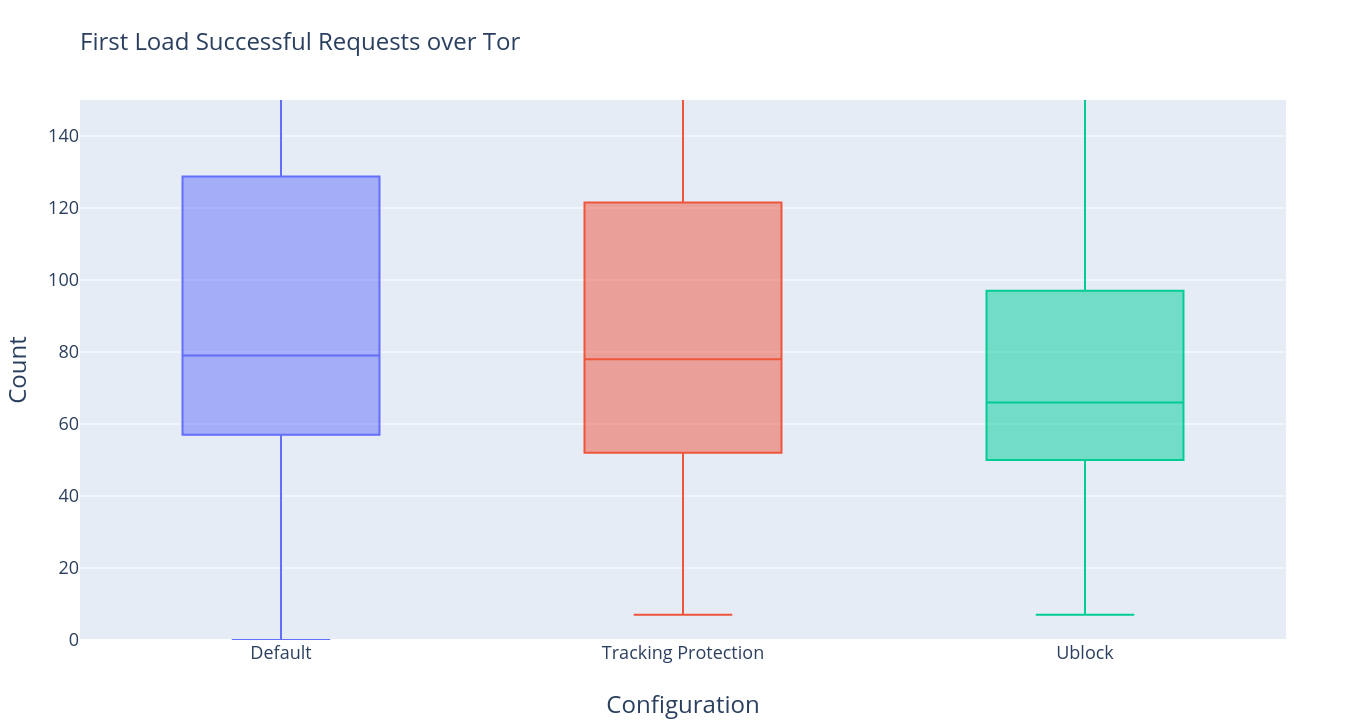

In [12]:
boxes = []
boxes.append(listToBox(loadData('responses_200',0,l,"tor","original"),"Default"))
boxes.append(listToBox(loadData('responses_200',0,l,"tor","trackingprotection"),"Tracking Protection"))
boxes.append(listToBox(loadData('responses_200',0,l,"tor","Ublock"),"Ublock"))
drawBoxes(boxes,'First Load Successful Requests over Tor',xaxis_title="Configuration",xaxis_angle=0,ylimit=150,yaxis_title='Count')